<a href="https://colab.research.google.com/github/TECH-NINJA06/login-next/blob/master/Tensorflow_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df[df["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


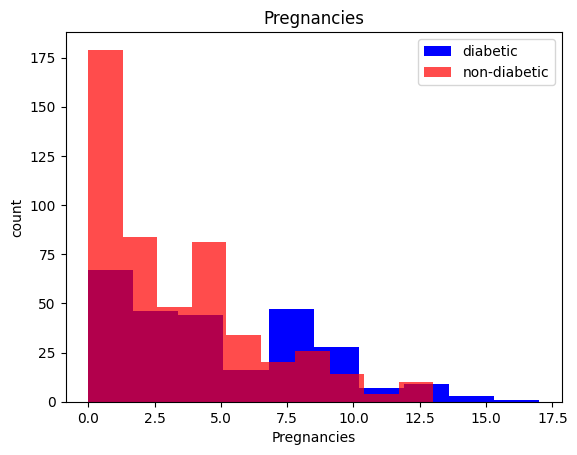

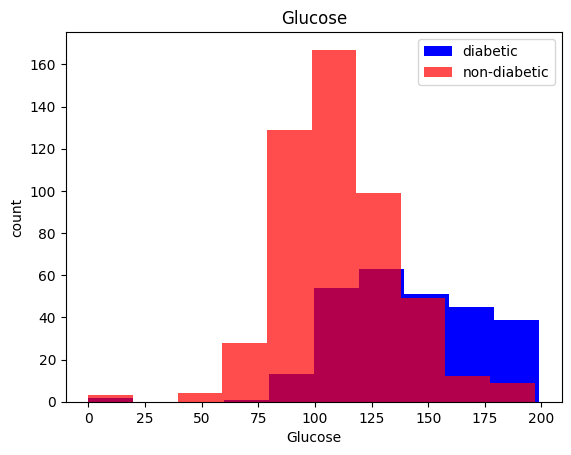

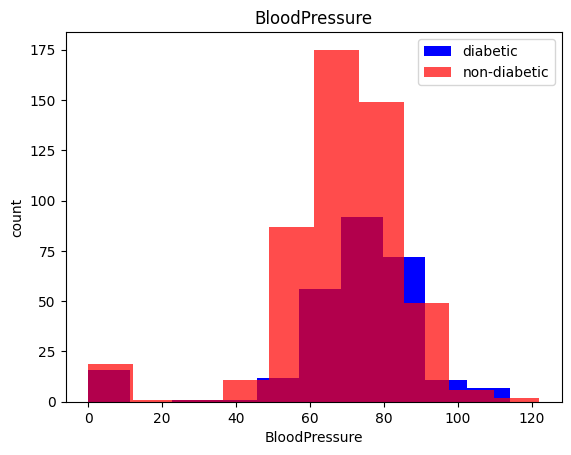

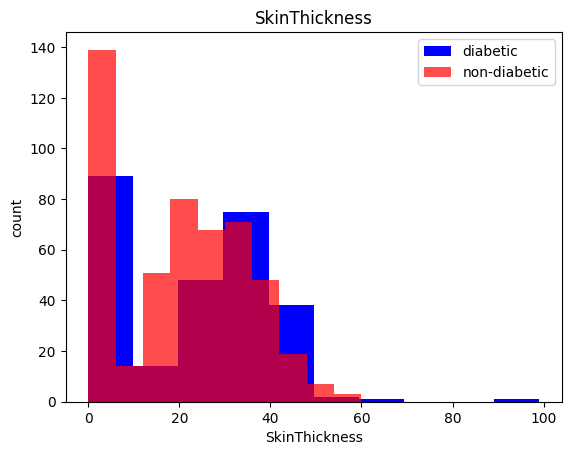

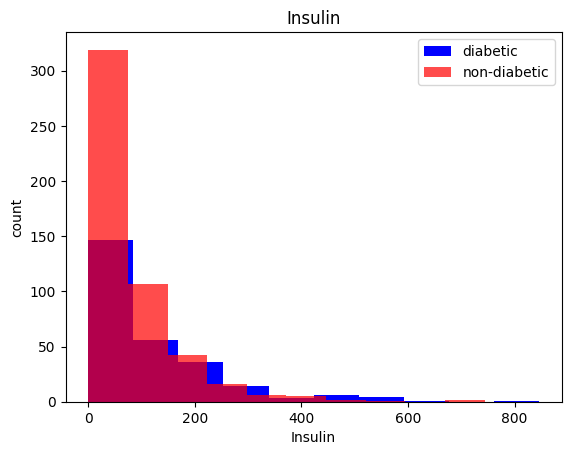

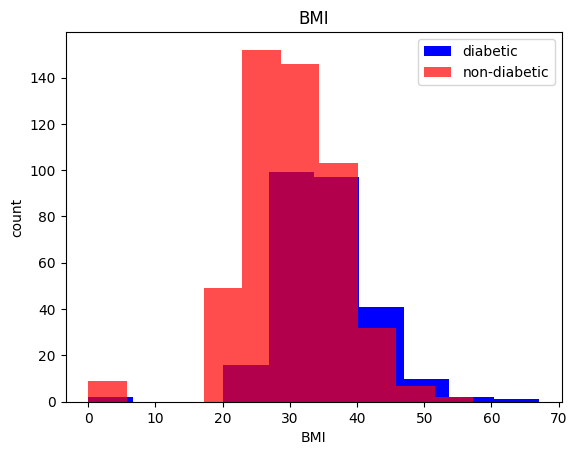

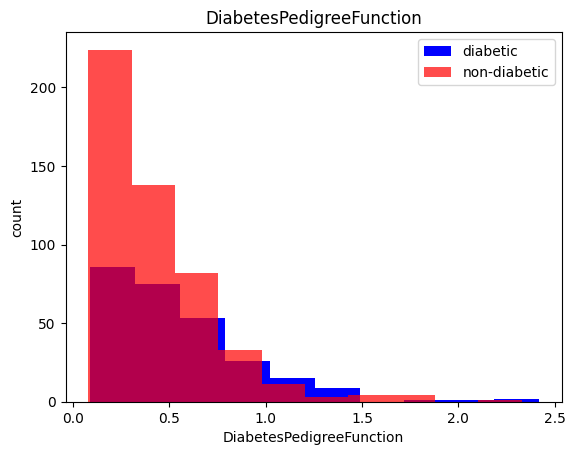

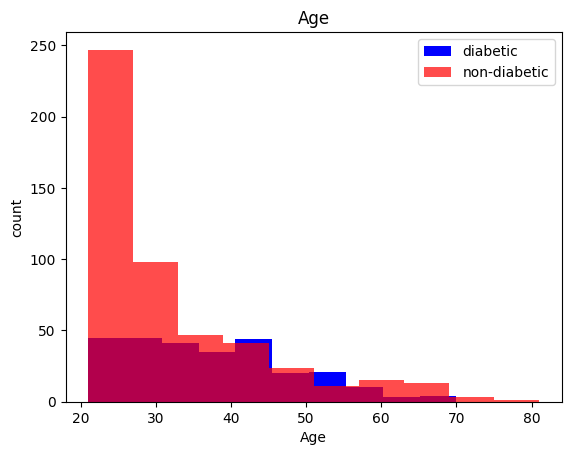

In [14]:
for i in range(len(df.columns)-1):
    label = df.columns[i]
    plt.hist(df[df["Outcome"]==1][label], color='blue', label="diabetic")
    plt.hist(df[df["Outcome"]==0][label], color='red', label="non-diabetic", alpha=0.7)
    plt.title(label)
    plt.ylabel("count")
    plt.xlabel(label)
    plt.legend()
    plt.show()

To normalize the data

In [23]:
len(df[df["Outcome"]==1]) , len(df[df["Outcome"]==0])

(268, 500)

In [26]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [40]:
x.shape , y.shape

((768, 8), (768,))

Scaling the data


In [41]:
scaler= StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1)))) # reshape makes y 2 dimensional
transformed_df = pd.DataFrame(data, columns=df.columns)

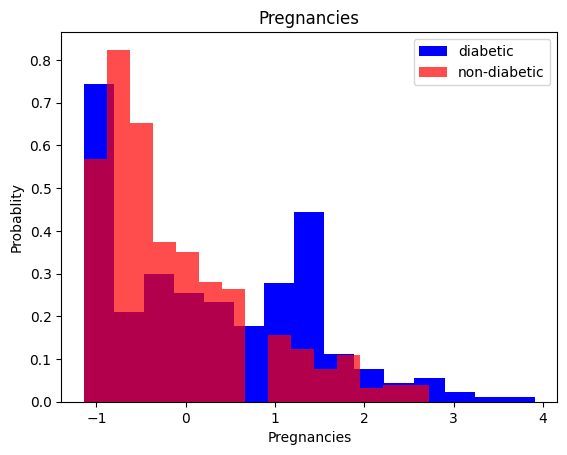

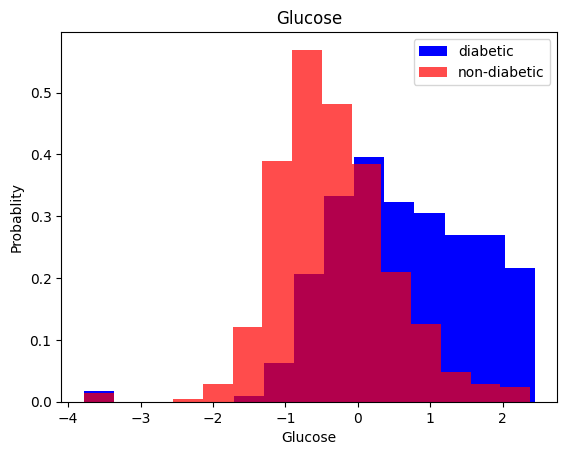

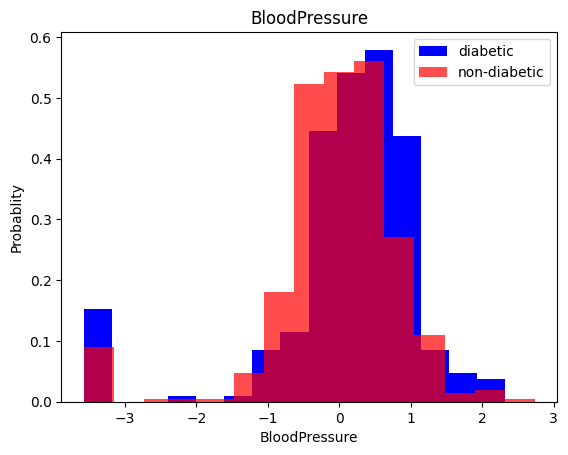

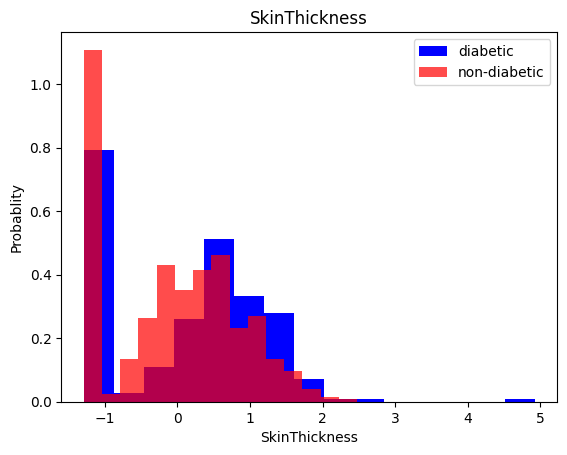

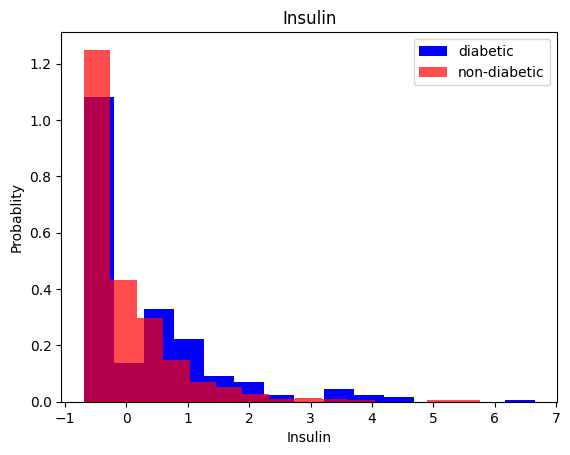

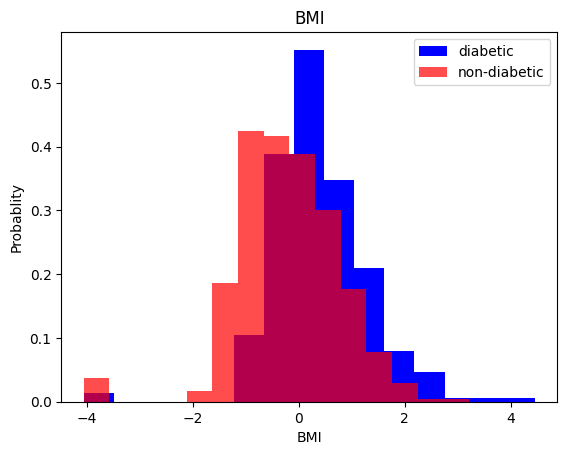

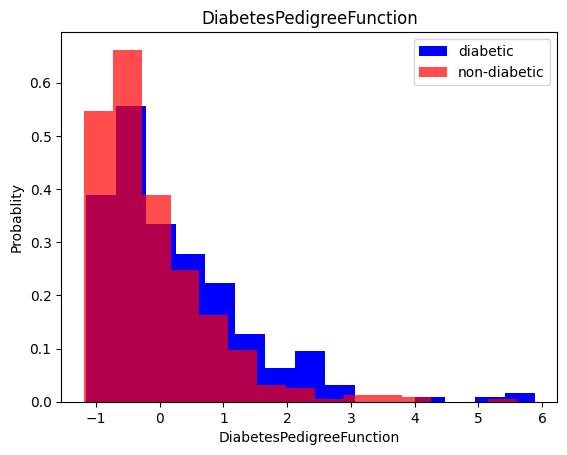

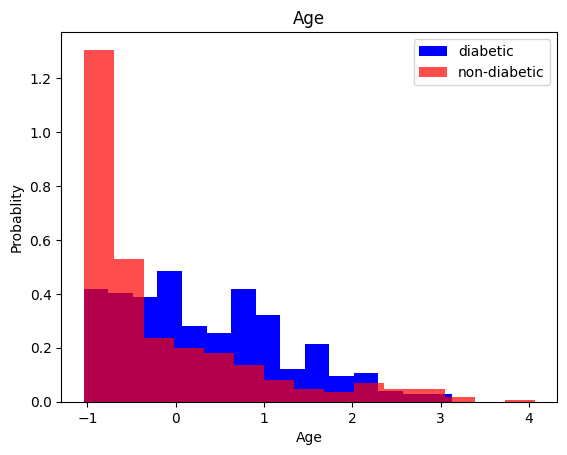

In [42]:
for i in range(len(df.columns)-1):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df["Outcome"]==1][label], color='blue', label="diabetic", density=True, bins=15)
    plt.hist(transformed_df[transformed_df["Outcome"]==0][label], color='red', label="non-diabetic", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probablity")  #Cause vr normalising the data to get them
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [27]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [28]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Making the number of outcomes of 1 and 0 nearly equal


In [45]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1)))) # reshape makes y 2 dimensional
transformed_df = pd.DataFrame(data, columns=df.columns)

In [46]:
len(transformed_df[transformed_df["Outcome"]==1]) , len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

Splitting the data

In [47]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'), #relu: activation-function = if x<=0 --> 0, x>0 --> x
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #sigmoid maps to zeros and ones
])

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4983


[0.6925260424613953, 0.4983333349227905]

In [51]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5150


[0.6899988651275635, 0.5149999856948853]

In [52]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6804 - accuracy: 0.5467 - val_loss: 0.6675 - val_accuracy: 0.5950
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6633 - val_loss: 0.6478 - val_accuracy: 0.6550
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.7250 - val_loss: 0.6247 - val_accuracy: 0.6900
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7450 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7433 - val_loss: 0.5812 - val_accuracy: 0.7000
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7450 - val_loss: 0.5648 - val_accuracy: 0.7050
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7583 - val_loss: 0.5508 - val_accuracy: 0.7150
Epoch 8/100
1

Accuracy is probably low cause in our data, some have scales from 0-800 while some have 0-5

In [53]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.8100


[0.4604015052318573, 0.8100000023841858]